# (The Effects of Borrower Rate on Loanees)
## by (Adebayo Ishola)

## Investigation Overview

> I want to observe if Borrower's interest rate will attract more loan collectors. I will also like to see if the employment status did affect the investors.

## Dataset Overview

> There are 97903 prosper in the dataset with 18 features (listing_number, credit_grad, loan_status, credit_grade, borrower_apr, borrower_rate, lender_yield, employment_status, amount_delinquent, total_trades, trades_never_delinquent(percentage), debt_to_income_ratio, stated_monthly_income, loan_original_amount, monthly_loan_payment, lp_customer_payments, lp_customer_Principa_payments, lp_interest_and_fees, investors). 16,034 data points were removed from the analysis due to inconsistencies or missing information. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosperloan = pd.read_csv('prosperLoanData.csv')

In [3]:
# extract some columns from the main dataset
prosperloan_new = prosperloan[['ListingNumber','CreditGrade','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EmploymentStatus','AmountDelinquent','TotalTrades','TradesNeverDelinquent (percentage)','DebtToIncomeRatio','StatedMonthlyIncome', 'LoanOriginalAmount','MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','Investors']]

In [4]:
# rename the columns names and make use of lowercase
prosperloan_new.rename(columns ={'ListingNumber':'listing_number','CreditGrade':'credit_grade', 'LoanStatus':'loan_status', 'BorrowerAPR':'borrower_apr', 'BorrowerRate':'borrower_rate', 'LenderYield':'lender_yield', 'EmploymentStatus':'employment_status', 'AmountDelinquent':'amount_delinquent', 'TotalTrades':'total_trades', 'TradesNeverDelinquent (percentage)':'trades_never_delinquent(percentage)', 'DebtToIncomeRatio':'debt_to_income_ratio', 'StatedMonthlyIncome':'stated_monthly_income', 'LoanOriginalAmount':'loan_original_amount', 'MonthlyLoanPayment':'monthly_loan_payment', 'LP_CustomerPayments':'lp_customer_payments', 'LP_CustomerPrincipalPayments':'lp_customer_principa_payments', 'LP_InterestandFees':'lp_interest_and_fees', 'Investors':'investors'}, inplace = True);

In [5]:
# rename NaN to N/A in the credit_grade columns
prosperloan_new['credit_grade'] = prosperloan_new['credit_grade'].fillna('N/A')

In [6]:
# drop every null value from the new dataset
prosperloan_new = prosperloan_new.dropna()

In [7]:
# convert credit_grade, loan_status, and employment_status into ordered categorical types
ordinal_var_dict = {'credit_grade': ['N/A','HR','E','D','C','B','A','AA'],
                    'loan_status': ['Cancelled', 'Defaulted', 'Chargedoff', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Completed'],
                    'employment_status': ['Not employed', 'Retired', 'Self-employed', 'Part-time', 'Full-time', 'Employed', 'Other']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosperloan_new[var] = prosperloan_new[var].astype(ordered_var)

## (Distribution of Borrower Rate)

> The Borrower Rate is the interest rate for loans. The dataset take on a very large range of values, from about 0.01𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢t0.36 at the highest. Its seems to be a normal distribution.

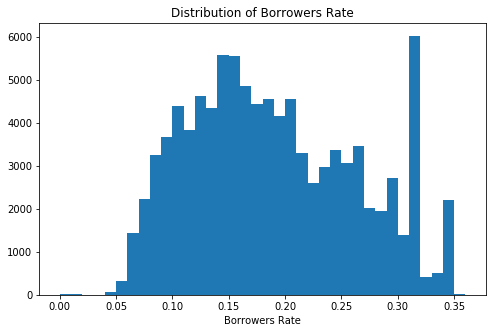

In [8]:
bins = np.arange(0, prosperloan_new['borrower_rate'].max()+0.01, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'borrower_rate', bins = bins)
plt.title('Distribution of Borrowers Rate')
plt.xlabel('Borrowers Rate')
plt.show()

## (Distribution of Borrower Annual Percentage Rate)

> The Borrower APR is the Annual Percentage Rate. The dataset take on a very large range of values, from about 0.02𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢t0.42 at the highest. Its seems to be a normal distribution.

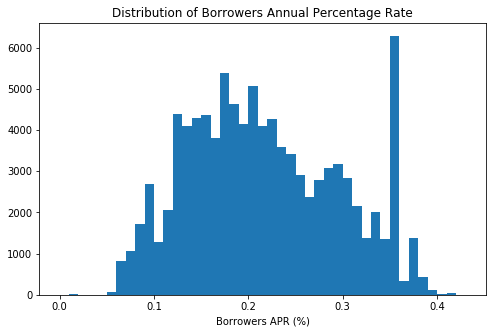

In [9]:
bins = np.arange(0, prosperloan_new['borrower_apr'].max()+0.01, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'borrower_apr', bins = bins)
plt.title('Distribution of Borrowers Annual Percentage Rate')
plt.xlabel('Borrowers APR (%)')
plt.show()

## (Distribution of Lender Yield)

> The Lender yield on the loan. Is equal to the interest rate on the loan less the servicing fee. The dataset take on a very large range of values, from about 0.14𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢t0.34 at the highest. Its seems to be a normal distribution.

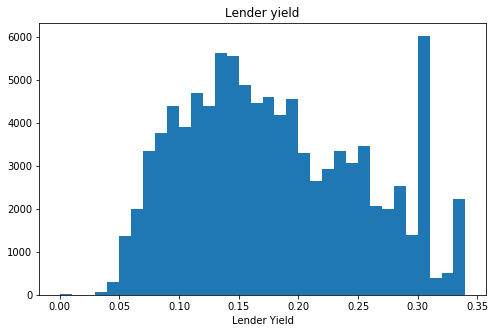

In [10]:
bins = np.arange(0, prosperloan_new['lender_yield'].max()+0.01, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'lender_yield', bins = bins)
plt.title('Lender yield')
plt.xlabel('Lender Yield')
plt.show()

## (Distribution of Investors)

> The Investors is the number of investors that funded the loan. The dataset take on a very large range of values, from about 1𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢t1000 at the highest. Plotted on both standard and logarithmic scale, the distribution of investors taks a right-skewed shape on standard scale and normal shape on logarithmic scale.

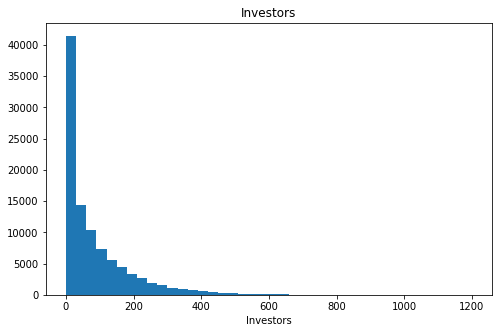

In [11]:
bins = np.arange(0, prosperloan_new['investors'].max()+30, 30)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'investors', bins = bins) 
plt.title('Investors')
plt.xlabel('Investors')
plt.show()

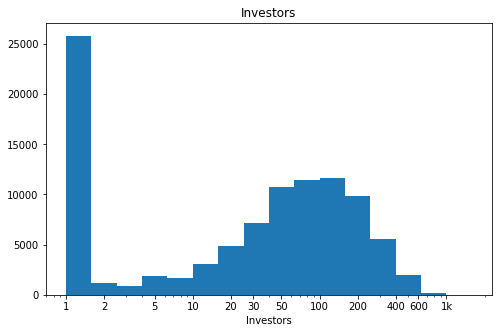

In [12]:
log_binsize = 0.2
bins = 10 ** np.arange(0, np.log10(prosperloan_new['investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'investors', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 30, 50, 100, 200, 400, 600, 1e3], [1, 2, 5, 10, 20, 30, 50, 100, 200, 400, 600, '1k'])
plt.title('Investors')
plt.xlabel('Investors')
plt.show()

## (Borrower Rate vs. Employement Status)

> This is to observe how the Borrowers rate is affected by Employment status. The is a positive effect of the Borrower rate on the Employment status. Because most of the loanees are all employed and also this shows that the Borrowers rate attracts more employment workers to receive loans.

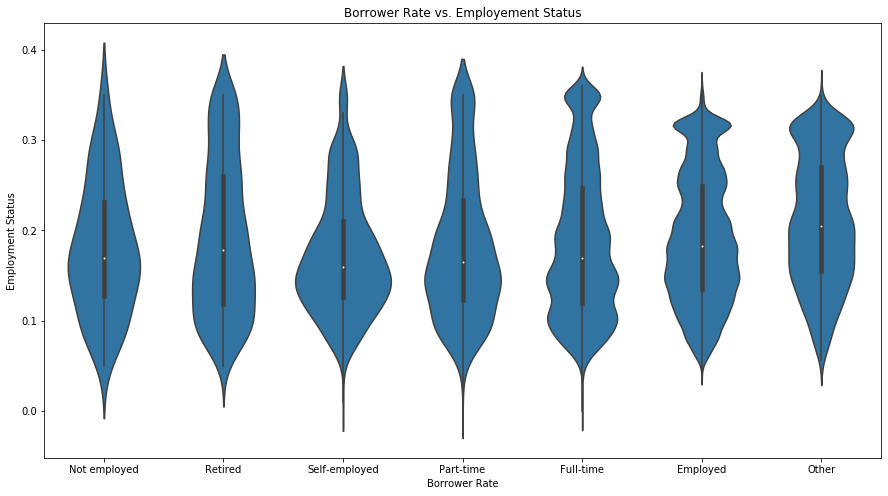

In [13]:
plt.figure(figsize = [15, 8])

base_color = sb.color_palette()[0]
sb.violinplot(data = prosperloan_new, x = 'employment_status', y = 'borrower_rate', color = base_color)
plt.title('Borrower Rate vs. Employement Status')
plt.xlabel('Borrower Rate')
plt.ylabel('Employment Status')
plt.show()

## (Investors vs. Employement Status)

> The observation here is how the Investors are affected by Employment status. Investors don't have any effect on the Employment status as they only invest in loans, but other features attract the employed and unemployed to get a loan. For most of the Employment status, Investors have their invest lower than average.

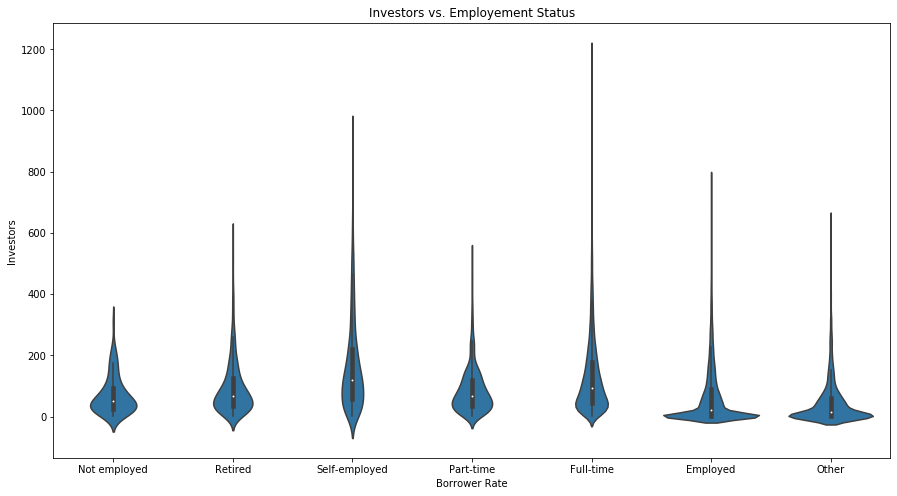

In [14]:
plt.figure(figsize = [15, 8])

base_color = sb.color_palette()[0]
sb.violinplot(data = prosperloan_new, x = 'employment_status', y = 'investors', color = base_color)
plt.title('Investors vs. Employement Status')
plt.xlabel('Borrower Rate')
plt.ylabel('Investors')
plt.show()

## (Borrower Rate and Borrower Annual Percentage Rate by Lender Yield ) 
> Borrowers rate ranges from 0.00𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡0.35. The Borrowers Annual Percentage Rate has its range from 0.0𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡0.4, and the Lender Yield ranges from 0.00𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡0.30. We observe a strong relationship and correlation coefficient which ranges from 0.20𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡0.35.

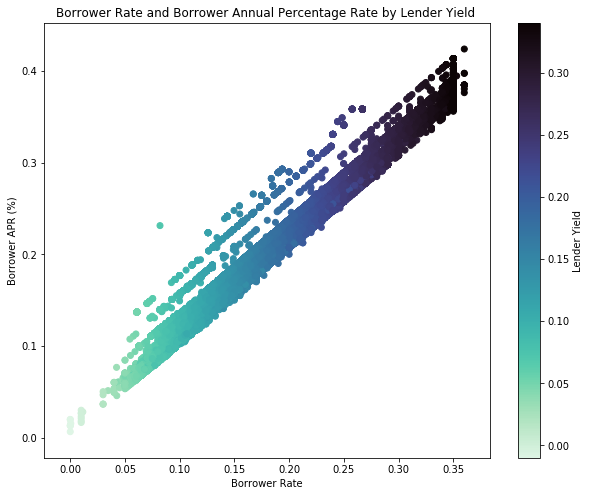

In [15]:
plt.figure (figsize = [10,8])
plt.scatter(data = prosperloan_new, x = 'borrower_rate', y = 'borrower_apr', c = 'lender_yield', cmap = 'mako_r');
plt.title('Borrower Rate and Borrower Annual Percentage Rate by Lender Yield ')
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower APR (%)');
plt.colorbar(label = 'Lender Yield');

## (Borrower Rate and Investors by Employment Status) 
>  Like we have observed, the Investors didn't affect some features. But they do gain from some. Borrower Rate is one of the features that encourage investors to invest in the loan program. The number of investors who invest in those whose employment status is Full-time and Employed is huge compares to another employment status. This is so because the borrower's rate attracts the loanees, and the profits for the investors will be good too.

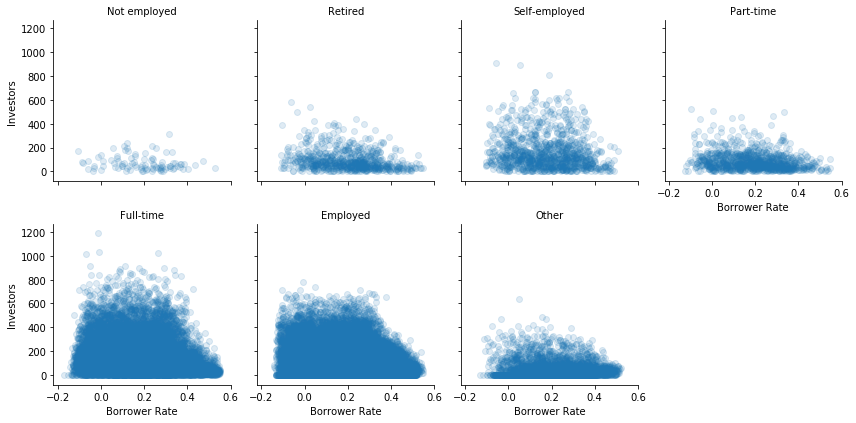

In [16]:
g = sb.FacetGrid(data = prosperloan_new, col = 'employment_status', palette = 'viridis_r', col_wrap = 4 )
g = (g.map(sb.regplot, 'borrower_rate', 'investors', x_jitter = 0.2, scatter_kws = {'alpha' : 1/7}, fit_reg = False)
     .set_titles("{col_name}"));
g.set_xlabels('Borrower Rate');
g.set_ylabels('Investors');

## (Borrower Rate and Borrowers Annual Percentage Rate by Credit Grade ) 
>  The relationship between Borrower Rate and Borrowers Annual Percentage Rate(APR) is strong. So every Credit Grade has a high correlation between them. This indicates that Borrower APR has almost the same effect on loanees as the Borrower Rate. Borrowers rate ranges from 0.00𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡0.3, and The Borrowers Annual Percentage Rate has its range from 0.0𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡0.4.

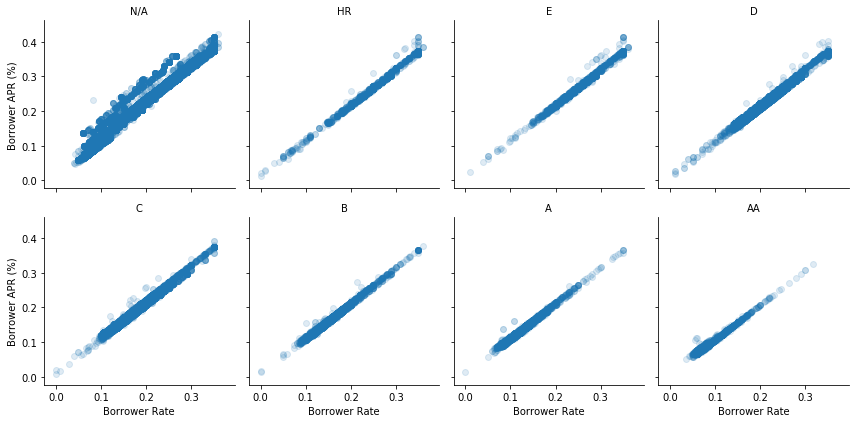

In [17]:
g = sb.FacetGrid(data = prosperloan_new, col = 'credit_grade', col_wrap=4, height = 3);
g = (g.map(plt.scatter, 'borrower_rate', 'borrower_apr',  alpha = 1/7)
     .set_titles("{col_name}"));
g.set_xlabels('Borrower Rate');
g.set_ylabels('Borrower APR (%)');

## (Borrower Rate and Lender Yield by Credit Grade ) 
> The relationship between Borrower Rate and Lender Yield is fairly weak. So every Credit Grade has its values moves from positive to negative values. This indicates that the Borrower rate is high for some Credit Grade and low for others. Borrowers rate ranges from -0.20𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡0.6, and The Lender Yield have its range from 0.0𝑎𝑡𝑡ℎ𝑒𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜𝑎𝑏𝑜𝑢𝑡0.3.

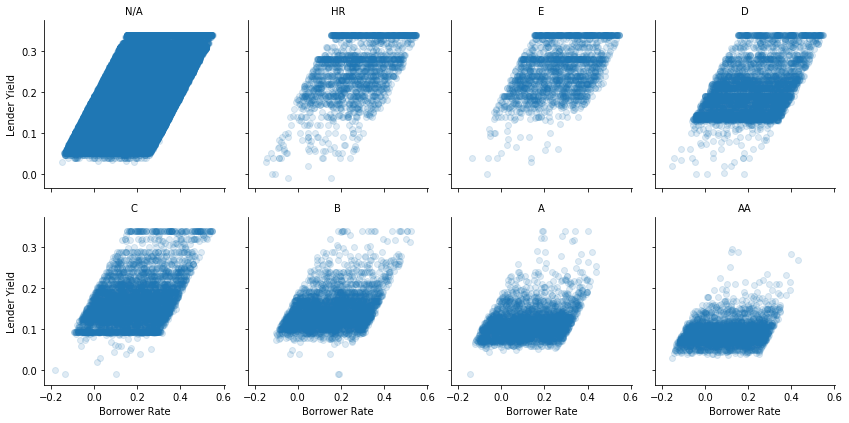

In [18]:
g = sb.FacetGrid(data = prosperloan_new, col = 'credit_grade', palette = 'viridis_r', col_wrap = 4 )
g = (g.map(sb.regplot, 'borrower_rate', 'lender_yield', x_jitter = 0.2, scatter_kws = {'alpha' : 1/7}, fit_reg = False)
     .set_titles("{col_name}"));
g.set_xlabels('Borrower Rate');
g.set_ylabels('Lender Yield');